In [130]:
import csv
def getPoints(file_name):
    with open (file_name, 'r') as file_obj:
        points = []
        reader = csv.DictReader(file_obj, delimiter=',')
        for row in reader:
            coordinates = []
            for col in reader.fieldnames:
                coordinates.append(float(row[col]))
            points.append(coordinates)
    return points

In [131]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [5, 5]
colorsValue = ['grey', 'red', 'blue', 'green', 'yellow', 'violet']
def draw(points, colorInd):
    for point in points:
        plt.scatter(point[0], point[1], 20, colorsValue[colorInd])

In [132]:
def distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 ) ** 0.5


In [133]:
def getAver(points, ind):
    summ = 0.0
    for point in points:
        summ += point[ind]
    return summ/len(points)

In [134]:
def closestСlusters(clusters):
    minAverDist = distance([getAver(clusters[0], 0),getAver(clusters[0], 1)], [getAver(clusters[1], 0),getAver(clusters[1], 1)])
    minfirst = 0;
    minsecond = 1;
    for first in range(len(clusters)):
        for second in range(len(clusters)):
            if (first != second):
                curAverDist = distance([getAver(clusters[first], 0),getAver(clusters[first], 1)], [getAver(clusters[second], 0),getAver(clusters[second], 1)])
                if (curAverDist < minAverDist):
                    minAverDist = curAverDist
                    minfirst = first;
                    minsecond = second;
    return clusters[minfirst], clusters[minsecond]

In [141]:
def  agglomerativeClustering(clusters):
    while (len(clusters) > 2):
        first, second = closestСlusters(clusters)
        newCluster = first + second
        clusters.remove(first)
        clusters.remove(second)
        clusters.append(newCluster)
        if (len(clusters) < 6):
            for i in range(len(clusters)):
                draw(clusters[i], i)
            plt.show()
    


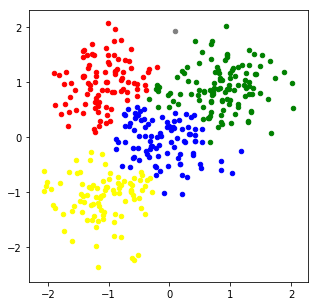

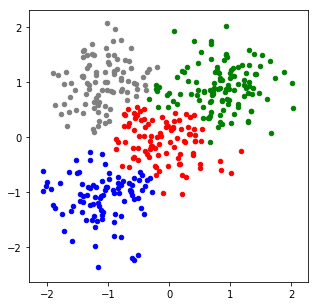

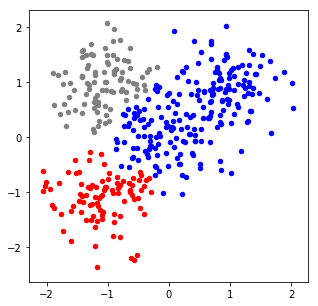

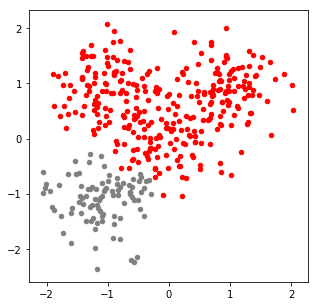

In [142]:
points = getPoints('datasets/blobs.csv')
clusters = []
for point in points:
    clusters.append([point])
agglomerativeClustering(clusters)